# Basics on Python and Quantum Computing
###### By: J. A. Orduz-Ducuara

## Regression with data!

To measure the elapsed time. 

In [1]:
import time 

In [2]:
start_time = time.time()

In [3]:
from platform import python_version
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data

In [4]:
df_sgnl=pd.read_csv("data/signal.csv")
type(df_sgnl)

pandas.core.frame.DataFrame

In [5]:
n_samples=100
np_Array_signal = df_sgnl[0:n_samples].to_numpy()
type(np_Array_signal)

numpy.ndarray

In [6]:
t_0_pT=np_Array_signal[:,[18,19]] # h_tt_pT, h_tt_eta

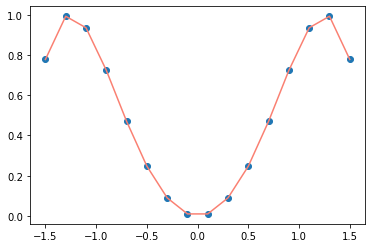

In [7]:
samples = 100
size = 1.5
step = 0.2
xs = t_0_pT[:,[0]]
ys = t_0_pT[:,[1]] 
     
def f(x):
    return np.sin(x ** 2) 

xs = np.arange(-size, size + step, step)
ys = list(map(f,xs))

plt.plot(xs,ys, color = "salmon")
plt.scatter(xs,ys)



In [8]:
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)
def circuit(theta0, x):
    qml.RY(theta0 * x, wires = 0)
    return qml.expval(qml.PauliZ(wires = 0))

def q_model(theta0, theta1, theta2, x):
    return circuit(theta0, x) * theta1 + theta2

def q_error(theta0, theta1, theta2):
    er = 0
    for x, y in zip(xs, ys):
        er += (q_model(theta0, theta1, theta2, x) - y) ** 2
    return np.sqrt(er) / len(xs)



In [14]:
 basis_state = [0, 1]
 print(circuit(basis_state,1)) 

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [15]:
  
  print(qml.draw(circuit)(basis_state,x))

NameError: name 'x' is not defined

In [9]:
theta0, theta1, theta2 = np.random.rand(3) * np.pi
gradient_fn_theta = qml.grad(q_error, argnum = [0,1,2])

lr = 0.46098

for epoch in range(101):
    gradiente = gradient_fn_theta(theta0, theta1, theta2)
    theta0 = theta0 - lr*gradiente[0] 
    theta1 = theta1 - lr*gradiente[1] 
    theta2 = theta2 - lr*gradiente[2] 
    if epoch % 20 == 0:
        print("epoch", epoch, "loss", q_error(theta0, theta1, theta2),"Time",time.strftime("%H:%M:%S",time.gmtime(time.time() - start_time)))
        

epoch 0 loss 0.674741049889369 Time 00:00:04
epoch 20 loss 0.2445613982233117 Time 00:00:04
epoch 40 loss 0.03833589282453924 Time 00:00:05
epoch 60 loss 0.028143371728081477 Time 00:00:06
epoch 80 loss 0.020438199011220626 Time 00:00:07
epoch 100 loss 0.012424026587358611 Time 00:00:08


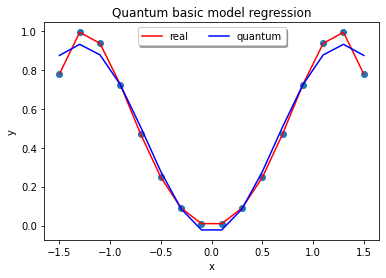

In [10]:
def q_solution(x):
    return circuit(theta0, x) * theta1 + theta2

ys2 = list(map(q_solution, xs))


plt.plot(xs,ys, color = "red", label = "real")
plt.plot(xs, ys2, "blue", label = "quantum")
plt.scatter(xs,ys)
plt.ylabel("y")
plt.xlabel("x")
plt.title('Quantum basic model regression')
plt.legend(loc='upper center', ncol=2, shadow=True)
plt.savefig('figs/RegreFunction.png', format='png',bbox_inches='tight',dpi=400)
plt.show()

# Versions

In [11]:
print("python version: ", python_version())
print("pennylane version: ", qml.__version__)

python version:  3.7.9
pennylane version:  0.23.1


# References


1. Qiskit tutorial: https://tinyurl.com/y6mh4bq8